In [10]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

file = open('gamma0.pickle', 'rb')
solutions = pickle.load(file)
file.close()

In [11]:
#Dispersion relation
R_dim = 30e3
R_nondim = R_dim/300e3
beta_dim = 2e-12
beta_nondim = beta_dim * 86400 * 300e3

#Fourier harmonics
S = 10 #spectral radius
N = 41

def omega(k,l):
    return -beta_nondim * k / (k**2 + l**2 + R_nondim**-2)

P = 5 #radius of peak
H = 0.008 #height of peak (max amplitude)

def A(k,l):
  return H * np.exp(-0.5*(k**2+l**2-P**2)**2/(2*P**2))

k,l = np.linspace(-S,S,N),np.linspace(-S,S,N)
K,L = np.meshgrid(k,l)
phi = np.random.uniform(0,2*np.pi,size=(N,N))
omega_vals = omega(K,L)

def modulo_grid(x, y):
  x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
  y_mod = np.mod(y + np.pi, 2 * np.pi) - np.pi
  return x_mod, y_mod

def f(t,pos):
  x_mod,y_mod = modulo_grid(*pos)
  t = 30
  dx = -np.real(np.sum(1j*K*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  dy = np.real(np.sum(1j*L*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  return [dx,dy]

In [ ]:
#all velocities in one list
initial_time = 0
velocity_list=[]
x=solutions


0.06313153192389942
-0.04978125763594739
-0.03609203799465386
0.004809994282168651
0.016328512306447683
0.017159034471193848
0.008434248463544304
0.003670819612961434
0.013349464845255756
0.00549352794488718
0.007532532365626158
0.014182666572118127
0.012810519457198459
0.0061856586170216206
0.012602370373545427
0.003690911404361442
0.008049276636982992
0.0050190377640952286
0.005402773648912614
0.006525740280706196
0.008139904000354501
0.008420777433262592
0.001987967405050342
0.004268579623731145
0.0052444331959620085
0.0016329783343851426
0.0042963505953567
0.002691198172899288
-7.802911844471124e-05
-0.0012187263412086146
-0.0026669740647589655
-0.0002826739324080349
0.0011748267768479138
-0.0037053223644197436
-0.0017485530102990129
-0.0027547757238696236
-0.00017013946013614845
-0.0024299818492513866
-0.0028127840693389933
-0.0027755509898284335
-0.0026456360252166016
-0.002276469528485847
-0.0017124524529246222
-0.0017790937927539192
-0.002651799600300945
-0.004666914196840434
-

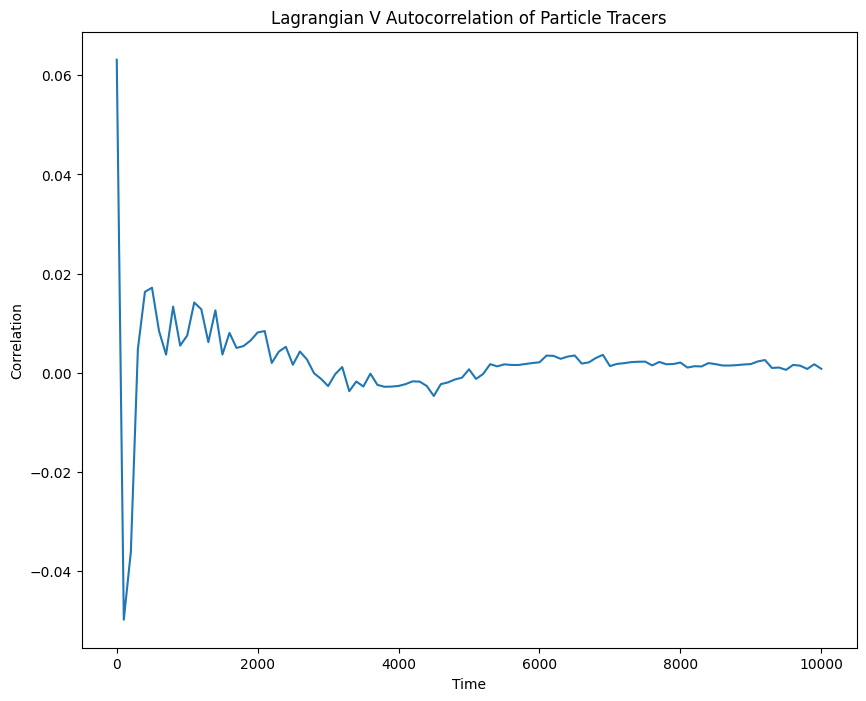

In [12]:
vaf_list=[] #empty velocity autocorrelations list
n = 10001
time_steps_list= range(0,10001, 100)

x_sq = 0
y_sq = 0

for time in time_steps_list:
    
    dot_prod = 0 #initialise dot product for each different time
    
    for sol in solutions:

        x = sol[:,0] #extrapolate coordinates for position to feed into function f 
        y = sol[:,1]
        
        initial_time = 0
        initial_x = x[0]
        initial_y = y[0]
        initial_x_vel = f(initial_time, [initial_x, initial_y])[0]
        initial_y_vel = f(initial_time, [initial_x, initial_y])[1]
        
        new_x = x[time]
        new_y = x[time]
        
        vel = f(time, [new_x, new_y]) #computes x velocity at specific time and position        
        x_vel = vel[0]
        y_vel = vel[1]
        
        x_sq += x_vel**2
        y_sq += y_vel**2

        dot_prod += initial_y_vel * y_vel 
        
    vaf_list.append(dot_prod/(y_sq)) 

for vaf in vaf_list:
    print(vaf)

fig, ax = plt.subplots()
ax.plot(time_steps_list, vaf_list)
fig.set_size_inches(10, 8)
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Lagrangian V Autocorrelation of Particle Tracers')
plt.show()


